In [64]:
# Install pandasql to run SQL queries on pandas dataframes
!pip install pandasql


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: makes plots show up inside the notebook
%matplotlib inline


In [66]:
# Load the dataset
df = pd.read_csv("/content/creditcard.csv")  # or replace with your file path

# Display shape and a few rows
print("Shape of the dataset:", df.shape)
df.head()


Shape of the dataset: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [67]:
# Dataset info and summary
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [68]:
# Check for any null values
print("Missing values:\n", df.isnull().sum())


Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


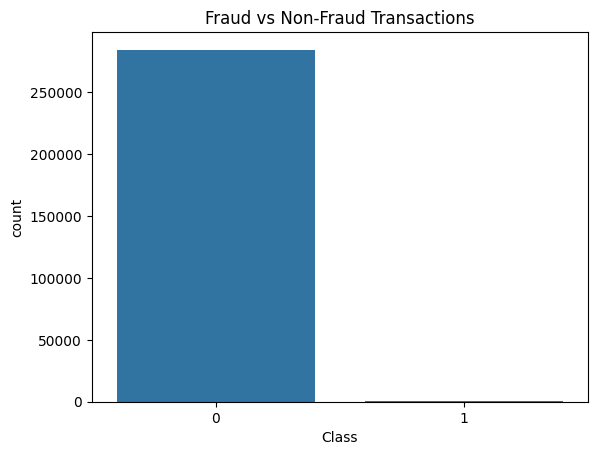

Percentage of Fraud: 0.1727%


In [69]:
# Class distribution
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

# Percentage of fraud
fraud_percent = (df['Class'].sum() / len(df)) * 100
print(f"Percentage of Fraud: {fraud_percent:.4f}%")


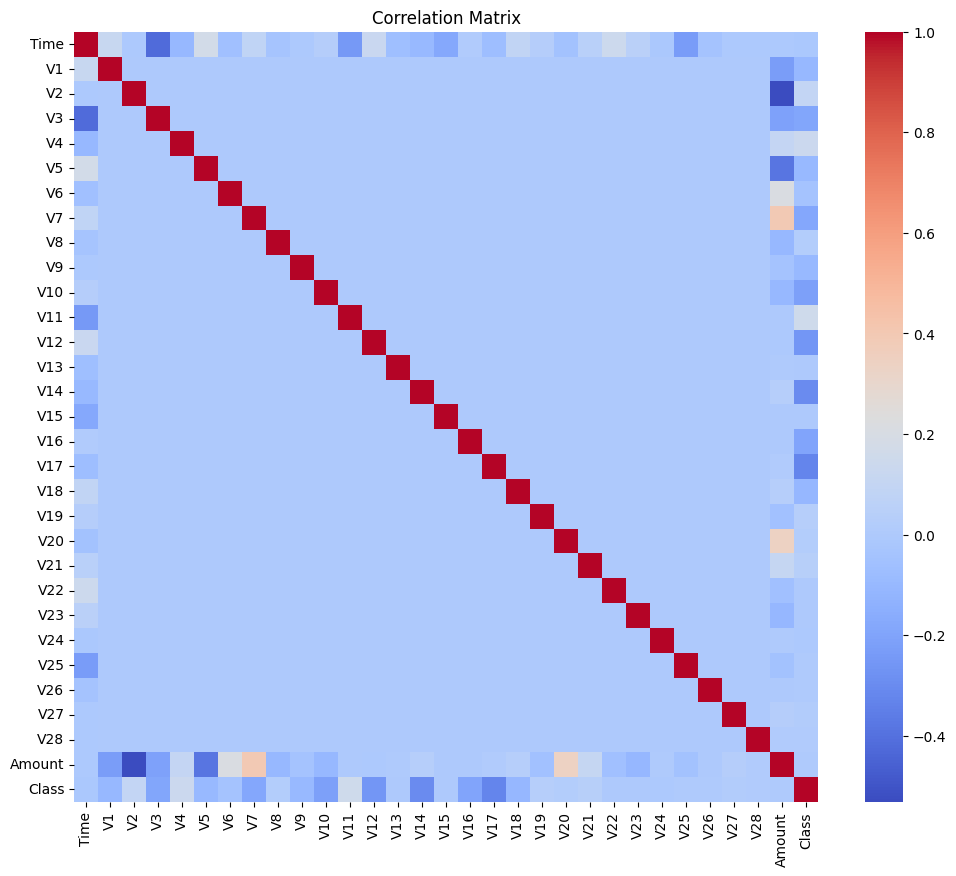

In [70]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()


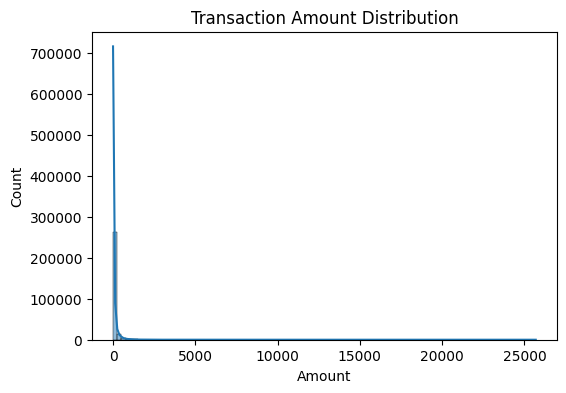

In [71]:
# Distribution of transaction amount
plt.figure(figsize=(6, 4))
sns.histplot(df['Amount'], bins=100, kde=True)
plt.title("Transaction Amount Distribution")
plt.show()


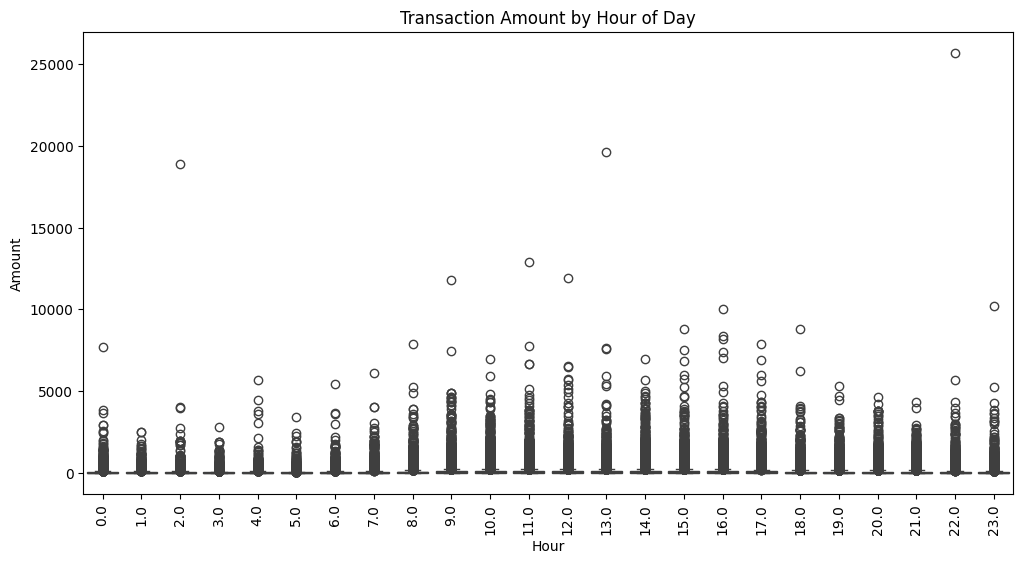

In [72]:
# Create hour column from Time
df['Hour'] = df['Time'] // 3600 % 24

# Boxplot of amount by hour
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Amount', data=df)
plt.title("Transaction Amount by Hour of Day")
plt.xticks(rotation=90)
plt.show()


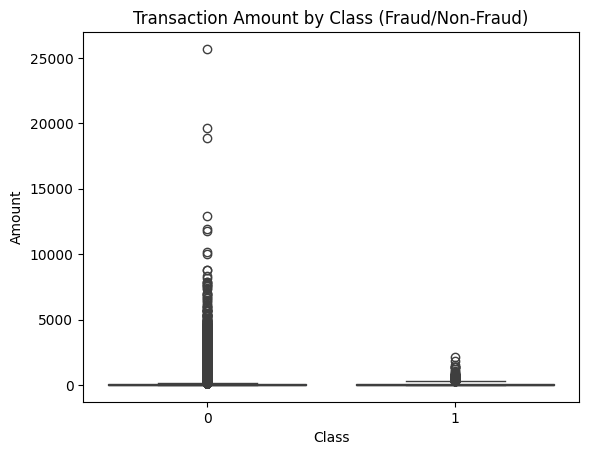

In [73]:
# Boxplot of amount for fraud and non-fraud transactions
sns.boxplot(x='Class', y='Amount', data=df)
plt.title("Transaction Amount by Class (Fraud/Non-Fraud)")
plt.show()


In [74]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

# Example SQL query to analyze frauds
query = """
SELECT Class,
       COUNT(*) AS Count,
       ROUND(AVG(Amount), 2) AS Avg_Amount,
       ROUND(MAX(Amount), 2) AS Max_Amount
FROM df
GROUP BY Class
"""
pysqldf(query)


,Class,Count,Avg_Amount,Max_Amount
0,0,284315,88.29,25691.16
1,1,492,122.21,2125.87


In [75]:
# Add log-transformed Amount column to normalize the scale
df['Amount_log'] = np.log1p(df['Amount'])

# Optional: Preview transformed column
df[['Amount', 'Amount_log']].head()


,Amount,Amount_log
0,149.62,5.014760
1,2.69,1.305626
2,378.66,5.939276
3,123.50,4.824306
4,69.99,4.262539


In [76]:
# Save cleaned and engineered dataset
df.to_csv("cleaned_creditcard.csv", index=False)
print("✅ Cleaned file saved as 'cleaned_creditcard.csv'")


✅ Cleaned file saved as 'cleaned_creditcard.csv'
